In [2]:
import yfinance as yf
#documentation: https://github.com/ranaroussi/yfinance


msft = yf.Ticker("MSFT")
baba = yf.Ticker("BABA")
aapl = yf.Ticker("AAPL")
fb = yf.Ticker("FB")
amzn = yf.Ticker("AMZN")
goog = yf.Ticker("GOOG")

print(msft)
"""
returns
<yfinance.Ticker object at 0x1a1715e898>
"""

yfinance.Ticker object <MSFT>


'\nreturns\n<yfinance.Ticker object at 0x1a1715e898>\n'

In [3]:
#get stock info
msft.info

{'zip': '98052',
 'sector': 'Technology',
 'fullTimeEmployees': 144000,
 'longBusinessSummary': "Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); and Skype, Outlook.com, and OneDrive. It also provides LinkedIn that includes Talent and marketing solutions, and subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. The company's Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also provides support services and Microsoft 

In [4]:
msft.history(period="yesterday")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-03,147.49,148.27,146.65,148.17,7404211,0,0


In [5]:
msft.history(period="now")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-03,147.49,148.27,146.65,148.14,7410633,0,0


In [7]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("MSFT GOOG AAPL AMZN FB BABA", period="now")

[*********************100%***********************]  6 of 6 completed


In [55]:
import datetime as dt
from datetime import timedelta
from datetime import date

end = date.today()
start = end - timedelta(days=20)


dt = pdr.get_data_yahoo("MSFT GOOG AAPL AMZN FB BABA", start, end)

dt_Close = dt['Close']

#to get range
#dt_Close.loc['2019-11-25':'2019-11-28']

[*********************100%***********************]  6 of 6 completed


In [56]:
dt_Close

,AAPL,AMZN,BABA,FB,GOOG,MSFT
Date,,,,,,
2019-11-12,261.959991,1778.000000,186.970001,194.470001,1298.800049,147.070007
2019-11-13,264.470001,1753.109985,182.479996,193.190002,1298.000000,147.309998
2019-11-14,262.640015,1754.599976,182.800003,193.149994,1311.459961,148.059998
2019-11-15,265.760010,1739.489990,185.490005,195.100006,1334.869995,149.970001
2019-11-18,267.100006,1752.530029,184.610001,197.399994,1320.699951,150.339996
2019-11-19,266.290009,1752.790039,185.250000,199.320007,1315.459961,150.389999
2019-11-20,263.190002,1745.530029,182.350006,197.509995,1303.050049,149.619995
2019-11-21,262.010010,1734.709961,184.860001,197.929993,1301.349976,149.479996
2019-11-22,261.779999,1745.719971,186.779999,198.820007,1295.339966,149.589996


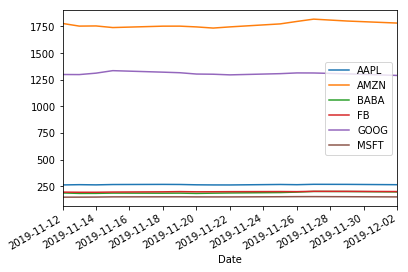

In [57]:
import matplotlib.pyplot as plt

#%matplotlib inline
# Plot the close price of the AAPL
dt_Close.plot()

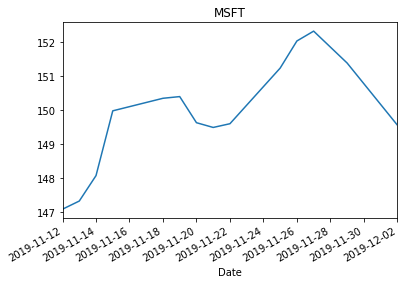

In [84]:
#saves plots to local folder
companies = []

for i in dt_Close:
    companies.append(i)
    
c=0
    
for i in companies:
    plt.clf()
    dt_Close[i].plot(title = i)
    savename = i+"_plot.png"
    #plt.savefig(savename)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D11D7B2F60>,
      dtype=object)

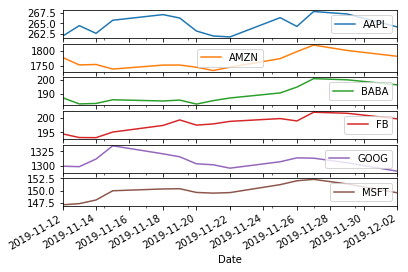

In [78]:
dt_Close.plot(subplots=True)